<a href="https://www.kaggle.com/code/maksiamiogan/yolov8-approx?scriptVersionId=175643578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

/tmp/ipykernel_42/3331446465.py:64: RuntimeWarning: invalid value encountered in power
  return(((A-D)/(1.0+((x/C)**B))) + D)


Baseline SMAPE: 11.99188746843928
A Increased SMAPE diff: 0.6446443616015056, Decreased SMAPE diff: 0.6893162313140309
B Increased SMAPE diff: 0.06187224722826912, Decreased SMAPE diff: 0.26320971865397347
C Increased SMAPE diff: 2.8472274952474113, Decreased SMAPE diff: 2.940834795606955
D Increased SMAPE diff: 2.380498341638706, Decreased SMAPE diff: 2.628062668053758
Baseline SMAPE: 5.4221239925353695
A Increased SMAPE diff: 0.817484979629767, Decreased SMAPE diff: 0.2170819748832855
B Increased SMAPE diff: 0.25311652487447045, Decreased SMAPE diff: 0.1633936673215839
C Increased SMAPE diff: 0.7665343766866979, Decreased SMAPE diff: 0.37995723577343465
D Increased SMAPE diff: 0.7204068975718112, Decreased SMAPE diff: 1.128564273539867
Baseline SMAPE: 40.50133245395174
A Increased SMAPE diff: 0.1468856112707897, Decreased SMAPE diff: 0.13890911315351673
B Increased SMAPE diff: 0.40264427194049546, Decreased SMAPE diff: 0.8489710847054823
C Increased SMAPE diff: 0.47079498239709494, D

/tmp/ipykernel_42/3331446465.py:286: UserWarning: Glyph 127826 (\N{CHERRIES}) missing from current font.
  plt.tight_layout()


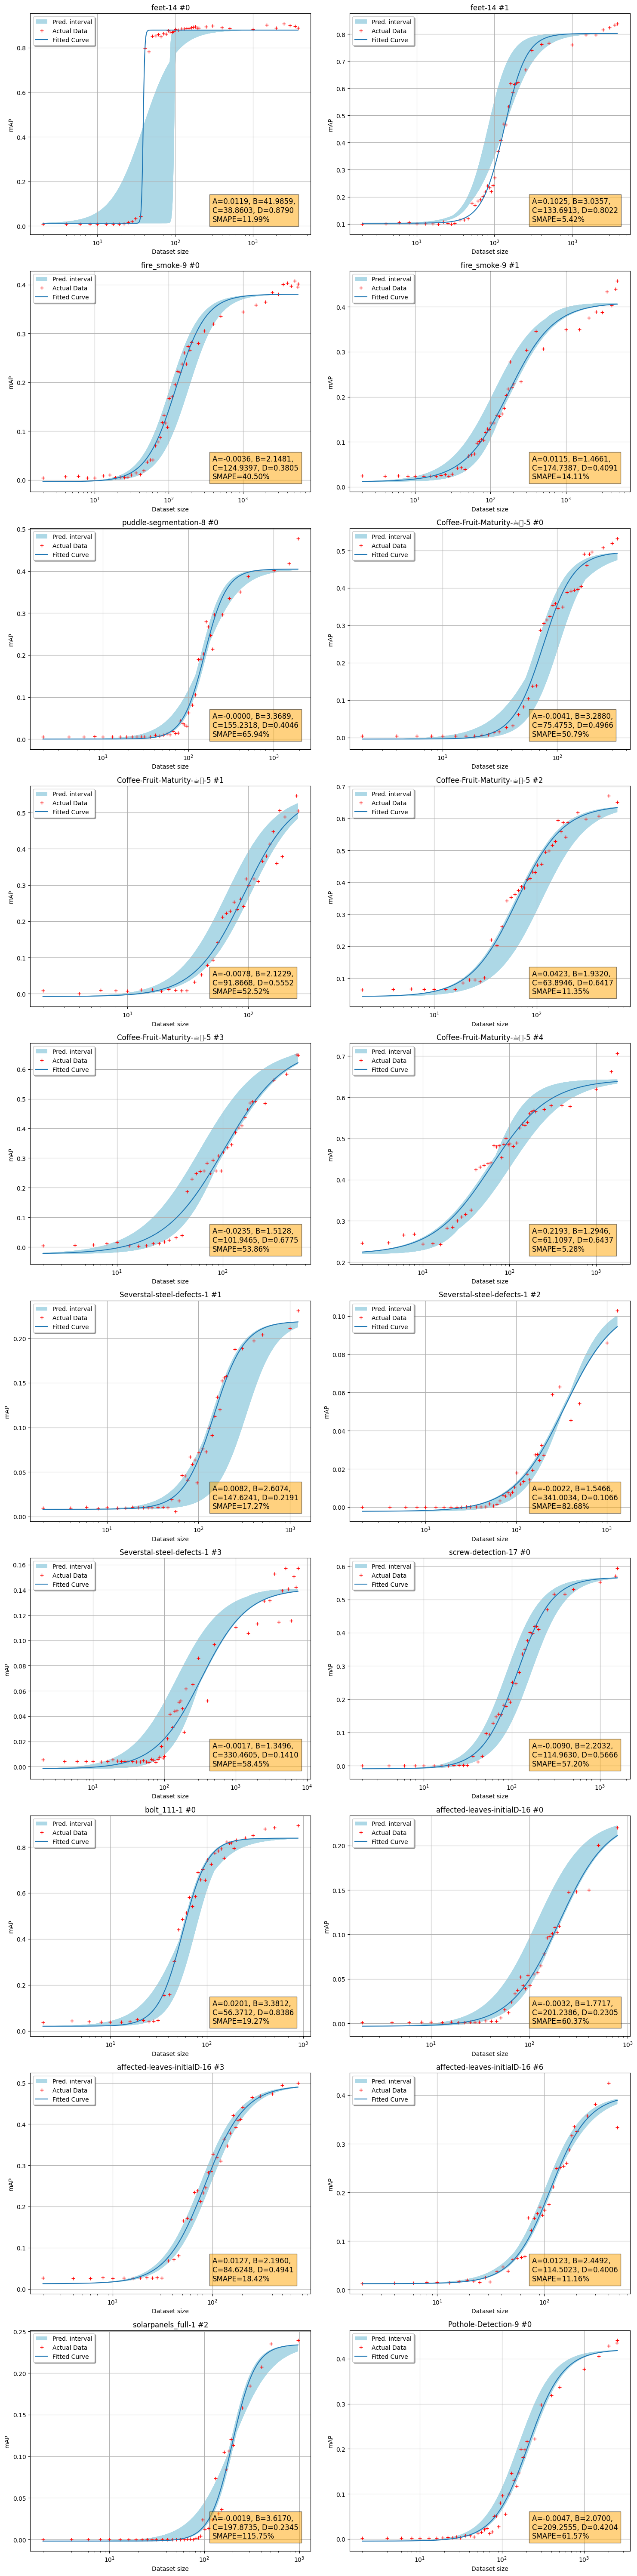

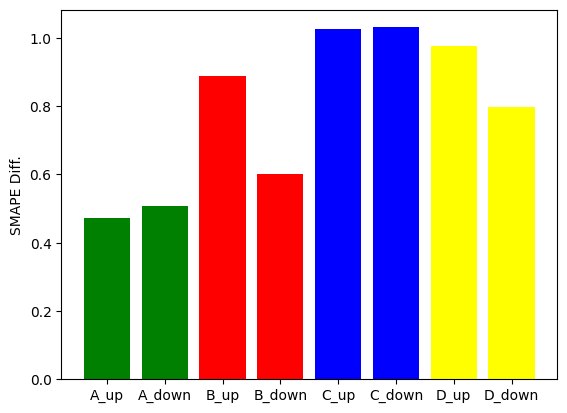

In [7]:
from scipy.optimize import curve_fit #This will do the actual curve fitting
import numpy as np
import matplotlib.pyplot as plt

def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def log4pl(x, A, B, C, D):
    return(((A-D)/(1.0+((x/C)**B))) + D)

def param_influence(x_values, y_actual, A, B, C, D):
    # Calculate baseline SMAPE
    y_pred_baseline = log4pl(x_values, A, B, C, D)
    baseline_smape = smape(y_actual, y_pred_baseline)
    print(f"Baseline SMAPE: {baseline_smape}")

    # Sensitivity analysis
    parameters = {'A': A, 'B': B, 'C': C, 'D': D}
    errors = {'A': [0,0], 'B': [0,0], 'C': [0,0], 'D': [0,0]}
    delta = 0.05  # Percentage to vary each parameter

    for param in parameters:
        # Increase parameter value
        params_up = parameters.copy()
        params_up[param] *= (1 + delta)
        y_pred_up = log4pl(x_values, **params_up)
        smape_up = smape(y_actual, y_pred_up)
        diff_up = np.abs(baseline_smape - smape_up)

        # Decrease parameter value
        params_down = parameters.copy()
        params_down[param] *= (1 - delta)
        y_pred_down = log4pl(x_values, **params_down)
        smape_down = smape(y_actual, y_pred_down)
        diff_down = np.abs(baseline_smape - smape_down)
        errors[param][0] = diff_up
        errors[param][1] = diff_down
        print(f"{param} Increased SMAPE diff: {diff_up}, Decreased SMAPE diff: {diff_down}")
    return errors



data_dict_values = {
    "/kaggle/input/clip-dataset/feet-14": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 3001, 3501, 3798], {0: [0.007998354528394015, 0.009186754695156445, 0.008606147362525655], 1: [0.00775809305467159, 0.008903405699157952, 0.008382683998575368], 2: [0.007887510576507899, 0.009103264708327785, 0.008562617676043854], 3: [0.007976761185197552, 0.009388700674636881, 0.008472458499193772], 4: [0.008128921287880645, 0.010154590113724642, 0.00850070571371787], 5: [0.007777691908847677, 0.0088727719247368, 0.008399757590166312], 6: [0.007728506288320197, 0.008925087505984126, 0.008373548157532135], 7: [0.00922948596582026, 0.011387562413643438, 0.010004604964653085], 8: [0.009830105175118833, 0.01251470127853226, 0.010431511796459335], 9: [0.016232632608481602, 0.019250071054154397, 0.017880939756424352], 10: [0.01935813575332595, 0.02293274723464134, 0.02102244627053116], 11: [0.03425884742571537, 0.04044085641633806, 0.038434687557811785], 12: [0.04348134417605419, 0.05240234796048973, 0.047807220757631], 13: [0.7981414008473514, 0.9163071983531503, 0.9120677936747674], 14: [0.7829313328541312, 0.8999052024619988, 0.8962770705551195], 15: [0.8516539468266477, 0.9710455780590502, 0.9674561977170949], 16: [0.8536735498868964, 0.9682566104016648, 0.9651736808008498], 17: [0.8588358408876923, 0.9799326545384144, 0.9734864856131226], 18: [0.8497393672611633, 0.9699663571856967, 0.9645029513350497], 19: [0.8635390078208035, 0.9812904353758635, 0.9788204133404986], 20: [0.8617617248661877, 0.9794687936804066, 0.9754417767302282], 21: [0.8760845551371942, 0.9906307617911677, 0.9906307617911677], 22: [0.8717054321633478, 0.9896689377609824, 0.9823136387936259], 23: [0.8701107039804393, 0.9855825263512683, 0.9833251114642599], 24: [0.8733750949821143, 0.9853035088529142, 0.9838939900788438], 25: [0.8819648821786743, 0.9932877672086295, 0.9926266327789218], 26: [0.8790231199776593, 0.9909304828747634, 0.9905754429422742], 27: [0.8838101028026351, 0.99353427951164, 0.9926268733698828], 28: [0.8846179088115191, 0.9945065438616797, 0.9944012353854589], 29: [0.8863253598167073, 0.9937535216622144, 0.993593643603107], 30: [0.8860260420530294, 0.9946859343310154, 0.9946859343310154], 31: [0.8900228137370331, 0.9942468477482512, 0.9929516034785504], 32: [0.8918687133999349, 0.9947486941655109, 0.9936764230504587], 33: [0.8939017732115857, 0.9945112735354713, 0.99383857915555], 34: [0.8890425994672396, 0.9947250961055922, 0.9946205199771376], 35: [0.8877155300228857, 0.994787841623121, 0.9938895497235121], 36: [0.8940336882822384, 0.994746474861131, 0.993369735424209], 37: [0.8979569180213647, 0.9947461150065121, 0.9940615391532804], 38: [0.8908205747221919, 0.9948128898128897, 0.989775218597761], 39: [0.8874347168912688, 0.9908177650817663, 0.9884066460270458], 40: [0.8819347661732373, 0.9941696593954032, 0.9891731380794928], 41: [0.9026834142949844, 0.9947899103912531, 0.9932512573099025], 42: [0.8888564668594213, 0.9944103379029563, 0.9914626929817277], 43: [0.9084754651315252, 0.994937106918239, 0.9934879287301139], 44: [0.9001682192796154, 0.9949368421052632, 0.9946894055713972], 45: [0.896276146033532, 0.9949789029535866, 0.99381288981289], 46: [0.8887798363767214, 0.9908135959379993, 0.9797658349701502]}),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 3001, 3501, 3798], {0: [0.09892962035492356, 0.40163173155167986, 0.014662934220732851], 1: [0.10113660103127971, 0.40329807465597584, 0.01648577324287875], 2: [0.10584619509103628, 0.41705065163569305, 0.019499622399136687], 3: [0.10591507638310642, 0.39134358443533607, 0.023099556331968894], 4: [0.10019158738109853, 0.40329584488608256, 0.015185162494471084], 5: [0.10069920491487246, 0.4040003415934325, 0.015139720114589953], 6: [0.10091417134150753, 0.406265182083427, 0.015119261611292727], 7: [0.09997847390328289, 0.40081468689748245, 0.01543510029045614], 8: [0.1067330600599038, 0.40701773508207806, 0.019459384556308565], 9: [0.10215558281750241, 0.4086055640211645, 0.01584299533521601], 10: [0.0994836384013073, 0.39800521158917135, 0.014926956826945878], 11: [0.10279224865150687, 0.4073965378781563, 0.01618064006894619], 12: [0.11581784334729402, 0.42712908494758495, 0.028022672467896893], 13: [0.11589260147103111, 0.4201370716682721, 0.032607721550127], 14: [0.11991276939967557, 0.4148117325915483, 0.0375052713652459], 15: [0.17691861149689067, 0.5232267168675975, 0.0873566473234966], 16: [0.16880202335527644, 0.4499058220713004, 0.10518904302790524], 17: [0.1842173781301652, 0.4871343804462917, 0.11479913986531448], 18: [0.1898183282975505, 0.4338546598966946, 0.15079174936608475], 19: [0.20198576448287614, 0.43736722659590505, 0.16485031491536503], 20: [0.2189986948584171, 0.4969719394288895, 0.18009029488959255], 21: [0.24004367014081476, 0.5057910473189927, 0.205944313496134], 22: [0.23363529519410303, 0.43304066845535405, 0.2279646784296716], 23: [0.22034788125068086, 0.42688942121837964, 0.21062831072906638], 24: [0.2419699754785069, 0.4553459340624745, 0.2367572996298349], 25: [0.270509873247238, 0.5653502652898462, 0.23368649409499692], 26: [0.3666159406453924, 0.6933735833879693, 0.3421496154170459], 27: [0.40826485020165737, 0.690628267406223, 0.44212700718583764], 28: [0.4684731431356406, 0.7380452746102495, 0.5184658113258719], 29: [0.4663265046283055, 0.7312231794779913, 0.5132384421147744], 30: [0.5316439790583471, 0.7831365063889217, 0.6207467752654828], 31: [0.6172030170361442, 0.8889392441728063, 0.7220900309183674], 32: [0.5838570068299775, 0.8487205663587575, 0.669130210584135], 33: [0.613960426611672, 0.8627906814757499, 0.7148091641434495], 34: [0.6199259455399561, 0.8881403605983574, 0.7380822297478603], 35: [0.6222147571708176, 0.8899533118000833, 0.7434705815838851], 36: [0.668266770876346, 0.9389943899638536, 0.8114730069646731], 37: [0.7400075975543821, 0.9712208594769346, 0.8849857567116524], 38: [0.761895180511927, 0.9821907225292617, 0.923380519509047], 39: [0.7675897183213495, 0.9885534808249657, 0.9280972968708029], 40: [0.7605734308294767, 0.9823408852137526, 0.9082295822542125], 41: [0.7971594044260384, 0.9881876290937505, 0.947517820634634], 42: [0.7975621301798486, 0.9885885517024114, 0.9589244983968043], 43: [0.8163970609936456, 0.9940370426796746, 0.9750281669733426], 44: [0.8231825523420877, 0.9936776292807672, 0.9676820062564402], 45: [0.8340230908344877, 0.9928582389487659, 0.9720237802088895], 46: [0.8387619358358073, 0.9942433378763396, 0.9819185662927272]})],
    "/kaggle/input/clip-dataset/fire_smoke-9": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001, 5501, 5547], {0: [0.004309738487204959, 0.010190138537048058, 0.0030427838933050214], 1: [0.007238929803151254, 0.0172410078950734, 0.004682047450070102], 2: [0.008123202971976504, 0.024350421674937076, 0.003784745794349811], 3: [0.004506835509932795, 0.011079506310911463, 0.003242522296274854], 4: [0.004588575961124107, 0.011078758427185377, 0.0033152228162653466], 5: [0.008589189455033135, 0.020812717863936948, 0.004074721756666993], 6: [0.010141039199365468, 0.028847284205794414, 0.005715550626609227], 7: [0.00501405229036718, 0.012137764482922262, 0.0038301799251778137], 8: [0.006137303734647368, 0.014726843048551838, 0.004821040575657805], 9: [0.005182273894050138, 0.01285080331560163, 0.003527300181069827], 10: [0.006131302142478332, 0.014732375139883342, 0.004556187258730222], 11: [0.010779592682672586, 0.02522147124538395, 0.008908497908006487], 12: [0.015160865959343895, 0.03267128816130754, 0.012678667426227955], 13: [0.011356489801539372, 0.025872400471797903, 0.008804736789684376], 14: [0.01920785374528337, 0.03998083828098778, 0.018125115674527768], 15: [0.03653406847426869, 0.07687766235732223, 0.03360895697810619], 16: [0.04112408864278057, 0.08655268909702922, 0.03722549511092096], 17: [0.04097315392167668, 0.0822701228698159, 0.03825291762331404], 18: [0.07037661633082522, 0.13923107821626515, 0.06565956964341448], 19: [0.07795981798843724, 0.1541374524501223, 0.07350120977762166], 20: [0.0869686742267406, 0.1746664171918359, 0.08039824170764678], 21: [0.11833452992140789, 0.22466300110041054, 0.1153788859670807], 22: [0.13248546394021707, 0.25560347592761173, 0.12247176621725193], 23: [0.11696914263698535, 0.2231947920574006, 0.11350763760059185], 24: [0.10857816457172227, 0.20514777894404015, 0.10508028565586415], 25: [0.16707921982235083, 0.3119870188330641, 0.15785225627865257], 26: [0.17096360699216817, 0.3354945162878056, 0.16195481606704026], 27: [0.1952185877457914, 0.36497683667105657, 0.19357684260904717], 28: [0.22320196980930432, 0.42564935444591023, 0.21464093215245525], 29: [0.22122198725235376, 0.4087460604678488, 0.21637250571679476], 30: [0.2374982134628516, 0.4505027610508526, 0.227056818571207], 31: [0.26089421695633724, 0.48021548685186694, 0.25968873169946294], 32: [0.23796213426109142, 0.4340999150453334, 0.23732592928591806], 33: [0.27434429456885084, 0.49306924679867975, 0.2777839627276582], 34: [0.26609469626515836, 0.4834997410966854, 0.2622562680227589], 35: [0.2822975081097789, 0.503029186942081, 0.27742929569850455], 36: [0.2798180293308566, 0.49266545323443733, 0.28978696606197835], 37: [0.30600154068763763, 0.5358015743601838, 0.3178154369788656], 38: [0.32007414547699736, 0.5587669274562794, 0.33284141543841833], 39: [0.3356177936877436, 0.565806083834372, 0.35587116136638736], 40: [0.3444941641122567, 0.5819465565171443, 0.3636492554824774], 41: [0.3586149680703147, 0.6059498916389048, 0.37968517165469096], 42: [0.3646245203329669, 0.6141754283884128, 0.3816795837284852], 43: [0.3841073840077559, 0.6348431491869873, 0.41482302479601973], 44: [0.38051050704521433, 0.6451776162622822, 0.4016602312050267], 45: [0.40130298692050753, 0.663834273877685, 0.42284009939196876], 46: [0.40315397888989823, 0.667894904077666, 0.4194895403590558], 47: [0.3975723963026492, 0.6628025131347448, 0.42062913057200835], 48: [0.4077849564272576, 0.6777686533479249, 0.43384934496937905], 49: [0.3951814217785716, 0.6548503082784937, 0.4206075116116008], 50: [0.40133907018173487, 0.6647329759760354, 0.43590261750084663]}), ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 4780], {0: [0.024339225853127176, 0.06186804499106979, 0.014666177176581337], 1: [0.02350079168276324, 0.05907361582617281, 0.015350440849210884], 2: [0.024308948866415703, 0.06077941905543305, 0.016274942890439462], 3: [0.02397455701220614, 0.061561307644508324, 0.01398654383806493], 4: [0.024198546985278367, 0.061134941384204076, 0.016017983601988483], 5: [0.023786525602374646, 0.05985364178027771, 0.015021179824650071], 6: [0.02390614983703211, 0.05966124664875782, 0.015434795213103012], 7: [0.023647256251869565, 0.05968363808709146, 0.014398160283572861], 8: [0.025740385637299062, 0.06590112494866997, 0.015273724290597292], 9: [0.027177958294232845, 0.06985297106438354, 0.016776873713009354], 10: [0.02343993887056995, 0.059612166208818096, 0.014788122106236836], 11: [0.028520663668529067, 0.07346530320681001, 0.016968058960658266], 12: [0.04164385614228776, 0.10247726615668276, 0.026404456904740838], 13: [0.043082588542674057, 0.10434211024998646, 0.030311019901306854], 14: [0.03866455949189512, 0.09510500268557924, 0.02532182899736583], 15: [0.0691209532999195, 0.15781593945798988, 0.053364010450618976], 16: [0.07137109309809546, 0.17860914773232467, 0.048895317650961626], 17: [0.07317583984831078, 0.16638374590165678, 0.04953853900034826], 18: [0.09761531083326627, 0.22041376836833698, 0.07310362791907879], 19: [0.10146405591771693, 0.23844574278492942, 0.0706546699245156], 20: [0.10493159602297346, 0.23950714148125163, 0.07956361948158197], 21: [0.10375021411481891, 0.24268784116682876, 0.07267919418758494], 22: [0.12119537386592735, 0.27147414914570844, 0.0953718877981932], 23: [0.12859552813472278, 0.28579678780421724, 0.10097302232669308], 24: [0.12834870404289983, 0.27989414899668874, 0.10623807441939949], 25: [0.142372751680378, 0.2965408560640956, 0.1230892563016629], 26: [0.14208056597568797, 0.30532059732283046, 0.12116653981631131], 27: [0.15967719909894068, 0.34169366845560323, 0.13408713358063684], 28: [0.15679193689561474, 0.3328636570424348, 0.13786700182153577], 29: [0.16226624154552027, 0.3352098272833294, 0.1443289385856427], 30: [0.17437137141035167, 0.35019718604526257, 0.15320396853118215], 31: [0.20353455314131047, 0.39915886748144147, 0.1822015933750385], 32: [0.21754402537088452, 0.4144514304046123, 0.1933292754168527], 33: [0.27757683466138594, 0.5034381464142668, 0.26301046034701164], 34: [0.22124240123189085, 0.43353223327919715, 0.2020725651645209], 35: [0.22901180850329098, 0.42270457823090857, 0.2286359319456981], 36: [0.23362241507012377, 0.4337733335665743, 0.22389364448879098], 37: [0.30422831347083834, 0.5271749872991524, 0.30741006026673046], 38: [0.34570090266874676, 0.5816749490242867, 0.36386275777859795], 39: [0.3064537384505889, 0.5286539124601661, 0.3222321753155176], 40: [0.3491826704198632, 0.6001147972600628, 0.34609270030616457], 41: [0.349998147803014, 0.5928730510725069, 0.359774107455506], 42: [0.37572165883156305, 0.6395587129230649, 0.3995307238949951], 43: [0.3886371471102743, 0.6624188238546813, 0.3983360492256699], 44: [0.3877651580530025, 0.6425243302930391, 0.3992048821538361], 45: [0.43374683035852407, 0.6967514229974542, 0.47370241428318166], 46: [0.40272606648217896, 0.6548595863832771, 0.41444784549480507], 47: [0.4396485163364777, 0.7003090096539795, 0.4665947873310354], 48: [0.4574796716883074, 0.7175568034852118, 0.4936002911958044]})],
    "/kaggle/input/clip-dataset/puddle-segmentation-8": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 1920], {0: [0.005767803699574613, 0.015378912758548328, 0.0036575018568473635], 1: [0.005780178197380123, 0.014889149411762614, 0.003945753320144483], 2: [0.005671208904902321, 0.015196289150207197, 0.0037253008841769113], 3: [0.00595891899814536, 0.01569107834754266, 0.003924486322505436], 4: [0.005730666202207515, 0.014976556070235628, 0.004038536403151532], 5: [0.0057390446475614355, 0.015142671708810217, 0.003923136231725862], 6: [0.005854115479306049, 0.0156488735685828, 0.0037806502955590017], 7: [0.005775415409261029, 0.014855354110889618, 0.0037924339602038847], 8: [0.00534949811814986, 0.015022020358416507, 0.0034431452164729185], 9: [0.005657967430566261, 0.015134343906586146, 0.0037995035504118143], 10: [0.005834088578082629, 0.015199233750444314, 0.0038429623679299488], 11: [0.00555471896532994, 0.015896772640371523, 0.003276916827035084], 12: [0.0057984587217343566, 0.015619861948740514, 0.003942831648904268], 13: [0.00951466002922904, 0.026409401316923785, 0.005461376932358174], 14: [0.006952008324712504, 0.02191656559743893, 0.0032572642214634103], 15: [0.009452353796663938, 0.024153429669886744, 0.0065739274268204525], 16: [0.012805186810680127, 0.033719849861955406, 0.005606299942420792], 17: [0.010806740340784864, 0.03217519854077283, 0.006420966906870081], 18: [0.018395372761523136, 0.04492804818941307, 0.012531748230694804], 19: [0.013123388199831176, 0.037697732485290035, 0.006619020963569627], 20: [0.014202910659996829, 0.03864849360469294, 0.006872149711502448], 21: [0.04318804022134852, 0.10138255170309496, 0.03342595389820645], 22: [0.03758527969389328, 0.08595586238668158, 0.02573023744487271], 23: [0.03439732955686092, 0.08366112594571701, 0.024696474194397106], 24: [0.0313012981241691, 0.07989269395189595, 0.02375912689627755], 25: [0.06275632908926744, 0.14480924491376682, 0.04071355705090627], 26: [0.08109451390706006, 0.16511979713738076, 0.06960438815384354], 27: [0.10586606683463262, 0.20219610565086935, 0.09929491363635205], 28: [0.1896476523399516, 0.35088268962978725, 0.18114863259558678], 29: [0.19019322716424064, 0.36992829353186013, 0.19249985926008198], 30: [0.2033856454793142, 0.37931803090479915, 0.20771419672305286], 31: [0.2792758253187597, 0.5018272306830417, 0.28582403994007854], 32: [0.2672825054888255, 0.47213625142615556, 0.2746525075769104], 33: [0.24725948272524034, 0.4629427330003708, 0.24606693000388724], 34: [0.2137770817101973, 0.4011042944031486, 0.21367591648918308], 35: [0.2964331251954459, 0.5134458619035233, 0.323058918953795], 36: [0.29659197366834966, 0.5215572571881989, 0.31059660248833737], 37: [0.33542960412780953, 0.5906692018950054, 0.36569200750015407], 38: [0.3503207286610876, 0.6287915423012425, 0.35334979359091245], 39: [0.3869315113716004, 0.6462145039773699, 0.42696408440929345], 40: [0.40172935425852535, 0.6907764314214497, 0.42612175090975785], 41: [0.4174862403772658, 0.7390277481926906, 0.41253083491789916], 42: [0.47763366278639535, 0.7762768989560697, 0.5424564151205312]})],
    "/kaggle/input/clip-dataset/Coffee-Fruit-Maturity-☕🍒-5": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 334], {0: [0.0043832675666966555, 0.010790611201889752, 0.0025171650647451715], 1: [0.004742927871270386, 0.012041211364186137, 0.0031163372946694705], 2: [0.004482873606201503, 0.011314824479685431, 0.0024656721647339976], 3: [0.004190695813152592, 0.010589900805590186, 0.0024147210574191106], 4: [0.004095874397013892, 0.010292301465870922, 0.0031229885255605735], 5: [0.00394253304836991, 0.0101393836671748, 0.002462050295801408], 6: [0.003990822395319815, 0.010159147999296615, 0.0024506679311098556], 7: [0.00391713864459896, 0.010171268571489912, 0.0028642670986670114], 8: [0.006578964501028533, 0.012755158029328298, 0.006682816725608488], 9: [0.007303369877798516, 0.013289095882026368, 0.006948749526634904], 10: [0.013224529617926875, 0.023351334852095746, 0.012610005442359996], 11: [0.015530015511371823, 0.029367404038925963, 0.01364054564102549], 12: [0.026759823381839215, 0.05556329737054069, 0.023334399315545273], 13: [0.032228866089321975, 0.06627959988554431, 0.029423410885106114], 14: [0.061366537198085304, 0.1281299939916393, 0.04459293952014909], 15: [0.08272361803950319, 0.18087707557950075, 0.0568777241298792], 16: [0.10490360514823356, 0.2291145624629202, 0.0654964145657824], 17: [0.1380933052138151, 0.27628618867030763, 0.09639109991990419], 18: [0.13923581059254206, 0.28698939983393756, 0.08884215293343213], 19: [0.28674729610135696, 0.5892770932125873, 0.20029733049325288], 20: [0.30601462479703223, 0.5963853016681515, 0.250844734075444], 21: [0.31494660793745777, 0.5897592387615328, 0.29089152558199727], 22: [0.32403400846217056, 0.6036156796443343, 0.3122290698055177], 23: [0.354473004207336, 0.6721502603439848, 0.3482766691164254], 24: [0.3586302840818588, 0.6685019185662247, 0.3568368062076278], 25: [0.34560209781871515, 0.6743607219296294, 0.2854076422772345], 26: [0.34892159647780285, 0.6561798571689575, 0.3164798456410948], 27: [0.3886638743737353, 0.7405942789156426, 0.3470839421312015], 28: [0.3924786439890853, 0.7459682714775008, 0.3486060343756443], 29: [0.39478615733970923, 0.7548035803485175, 0.3545645612546237], 30: [0.39688311464396664, 0.7593457632599241, 0.38147243184883867], 31: [0.40506841229991936, 0.7668424176725905, 0.3911601686900259], 32: [0.4906333292437613, 0.847004250888171, 0.5161988249297683], 33: [0.46146418312940557, 0.8261547645000662, 0.44345777431294114], 34: [0.491091867093769, 0.8550977518898158, 0.5098801460568837], 35: [0.4964720580905036, 0.8604330006749761, 0.5055879316361478], 36: [0.5078153555879694, 0.8799055360477802, 0.5215929371382722], 37: [0.5198956424803816, 0.9137038853788146, 0.4919854219096993], 38: [0.5326361654891317, 0.9076212167281197, 0.5274179481097611]}),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 258], {0: [0.008131848309780119, 0.03292688574384428, 0.0], 1: [0.0, 0.0, 0.0], 2: [0.010214312568998081, 0.0375353718071387, 0.0], 3: [0.008326599975373643, 0.03729891562962557, 0.0], 4: [0.00768356305936051, 0.0338626766185417, 0.0], 5: [0.011337375794324957, 0.0443309463808433, 0.0], 6: [0.010948416690180332, 0.04494239482200647, 0.0], 7: [0.007879666376228098, 0.032293680693462, 0.0], 8: [0.011803700674015472, 0.045695001545207115, 0.004543959775368945], 9: [0.010212325276917962, 0.03735273264506661, 0.004660230702166186], 10: [0.008999816664609448, 0.035951673255764885, 0.0], 11: [0.008304324244798619, 0.03701718839228771, 0.0], 12: [0.03273335998318437, 0.056047670523502555, 0.028858180051150893], 13: [0.0528482085001233, 0.08258160964398048, 0.04835785239373473], 14: [0.07890622832470533, 0.11221988039555694, 0.07961921850584606], 15: [0.09281934106980905, 0.11552664884341482, 0.09217240789261197], 16: [0.1415694487050729, 0.1794310416613459, 0.16113117062640048], 17: [0.211404129086277, 0.27692954094556427, 0.22845563190429657], 18: [0.2221233215354624, 0.28850138227165856, 0.2393984679919387], 19: [0.2282419878062596, 0.2922757783275347, 0.2620855468812524], 20: [0.2535293099499869, 0.32457833167629413, 0.2911839399041192], 21: [0.23268427650996615, 0.2918484380524293, 0.2627523849658205], 22: [0.26155899486247147, 0.3363794576128357, 0.2928056831884488], 23: [0.24187183709099275, 0.316535078568892, 0.27150057035440356], 24: [0.31768953054241866, 0.415387659136413, 0.3601502394156383], 25: [0.29920797281269407, 0.38470625198315656, 0.33146330288615083], 26: [0.31736262421027683, 0.40328017057916943, 0.36916949748085903], 27: [0.31081107643035927, 0.4065735373731117, 0.36106398338199885], 28: [0.36609462461682984, 0.46323000313915697, 0.4181239955607953], 29: [0.3803791538787282, 0.488721568319899, 0.43403344752822093], 30: [0.4135600001489828, 0.5374679902946647, 0.4835578423716676], 31: [0.4485441942702659, 0.5911802756282553, 0.5255049350613507], 32: [0.3597647122319919, 0.4888140034244172, 0.41688212126938895], 33: [0.5058852903413678, 0.6501893135778659, 0.5911603743682743], 34: [0.3789313021245919, 0.5087920610514247, 0.45503998168417], 35: [0.48815122347984374, 0.6490043481984935, 0.5776667931477938], 36: [0.5464709091399467, 0.7089341889024068, 0.6282781434070452], 37: [0.5048625433247822, 0.6836816528718817, 0.5951482289796615]}),
     ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 608], {0: [0.06428346978561376, 0.10510348116731151, 0.06915527417968158], 1: [0.06502848810070382, 0.10573590834270281, 0.06947555435343768], 2: [0.06632467960400874, 0.10660761512309457, 0.07089794722022365], 3: [0.06539158486120906, 0.10651148381969418, 0.06959408202275562], 4: [0.06532804116017743, 0.10633702587989917, 0.06971757742264001], 5: [0.06549767923507557, 0.10610799058186675, 0.07022049114254324], 6: [0.06517626812518376, 0.1057627858268293, 0.0697264710669174], 7: [0.08474269817241362, 0.13359707493486137, 0.09120157139232357], 8: [0.0942463750626468, 0.1483007595362178, 0.10088717998155818], 9: [0.09449175712895354, 0.15063746659126767, 0.10112459152627183], 10: [0.08994366335342552, 0.14428459896419682, 0.09819226280580215], 11: [0.10194865055227476, 0.16059114132108818, 0.10943497968036872], 12: [0.22037979601733643, 0.33304178977935844, 0.23913101389296731], 13: [0.20200814728661576, 0.3062535170314191, 0.2175274064763726], 14: [0.26140669218442936, 0.381255923820467, 0.2854057104782408], 15: [0.34324609918390303, 0.46643797825076605, 0.38736972710902284], 16: [0.35333169072476983, 0.4803972069824206, 0.4001741727259559], 17: [0.36272604071330405, 0.4923577099401724, 0.41205166299055607], 18: [0.37542046897228243, 0.5074410484956973, 0.4232987390005021], 19: [0.38713919584943024, 0.5242494087050363, 0.43978399855231026], 20: [0.38308302062805555, 0.5187878563936148, 0.43523930103241415], 21: [0.4095248117936444, 0.5702021744576211, 0.4523384584217697], 22: [0.41267081300377706, 0.5606567631942765, 0.46738971314206124], 23: [0.4327995667407517, 0.577609905270944, 0.48607755203925274], 24: [0.4320527561964532, 0.5794138814553911, 0.49027624799519676], 25: [0.4550839947584211, 0.6223452506164999, 0.5103340599937674], 26: [0.45682972296999524, 0.6238444890356337, 0.5018408145109254], 27: [0.4951385880608309, 0.6708755905596946, 0.549702889925845], 28: [0.4991031245174618, 0.6809113828305362, 0.5518216533158236], 29: [0.5159468708182532, 0.6951936557724256, 0.5610453232238022], 30: [0.5290186606513547, 0.7260166184996313, 0.5890699330016917], 31: [0.59476522642522, 0.8013761816598605, 0.6705765386868654], 32: [0.5601249432029896, 0.7552714826597982, 0.6207887604720157], 33: [0.5873255966945193, 0.7877533675874974, 0.6576067374963497], 34: [0.5419801414984413, 0.7444393518824233, 0.6040143534631943], 35: [0.5880173166089369, 0.7948186162671224, 0.6580496667592464], 36: [0.6186688862487523, 0.8351874102432519, 0.7004530673783985], 37: [0.5985845977944334, 0.808199900274875, 0.6680194176258925], 38: [0.6084115905271821, 0.8279458534635777, 0.6784006640478818], 39: [0.6711499413427768, 0.8887769807140071, 0.7489788532142728], 40: [0.6514792458660785, 0.8736793167568638, 0.7540814674753213]}),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 513], {0: [0.004552271095823858, 0.013938777477781139, 0.0021951074453086584], 1: [0.005449573892195469, 0.014205934520770317, 0.0048405090359084045], 2: [0.007997870082572148, 0.01678126034286128, 0.00843276813301648], 3: [0.012235548952876235, 0.01907573841411522, 0.013299616279928286], 4: [0.016694655195877584, 0.022836101056733855, 0.018254083883495222], 5: [0.004134991496696876, 0.012943531423622824, 0.0024042126617483], 6: [0.003678456448098847, 0.01160356377102906, 0.002266690148642217], 7: [0.005081160121912649, 0.013330944359720964, 0.0036844634912797866], 8: [0.011925643561351775, 0.022055611990316918, 0.011156199188737208], 9: [0.01208512068179822, 0.023272092254803308, 0.011563020352335097], 10: [0.017023969746364213, 0.027252044657513273, 0.017961636126426327], 11: [0.023380981278945688, 0.03403658295065442, 0.02651672016118432], 12: [0.0327848725522704, 0.04505210794574412, 0.03746550915617982], 13: [0.03961254277046399, 0.054508812590512504, 0.04540984035215949], 14: [0.18809020804057805, 0.2629385629924818, 0.21879615562457105], 15: [0.2292053987820392, 0.3110394073591759, 0.26163553513995325], 16: [0.2485979219929158, 0.33579456000218133, 0.28908759887588265], 17: [0.25533533887004345, 0.34599014709243336, 0.29727008262759363], 18: [0.2566639851699618, 0.3457836590028123, 0.29579057616579474], 19: [0.2826738165543328, 0.38338581418713724, 0.31513305684010673], 20: [0.2501351214887197, 0.3384251849311151, 0.2914688489859031], 21: [0.292839641776035, 0.3987261089710328, 0.3211377687705692], 22: [0.2565321700480392, 0.3464162842515197, 0.29667131408969377], 23: [0.3075505502665205, 0.41127727840470335, 0.3457277705261971], 24: [0.2569215586397038, 0.34586610109885246, 0.29841190608628615], 25: [0.3208811132182622, 0.4245656686632929, 0.3615338873576523], 26: [0.3352661316670563, 0.44136919257097723, 0.37175398606761334], 27: [0.34569050107236043, 0.4532327540589558, 0.38080793235310223], 28: [0.38652327049099006, 0.5044852446848241, 0.42961589334437233], 29: [0.4024100399705639, 0.5219118135301452, 0.4667280605137172], 30: [0.4098765564755863, 0.5237148438298138, 0.467610113557497], 31: [0.43699596018403775, 0.5748433667533854, 0.49603423693429305], 32: [0.46297655765326085, 0.6063826566657909, 0.5253464776790926], 33: [0.48559284507334766, 0.6245160975140254, 0.5578977753019756], 34: [0.49108464595248724, 0.6283974228701374, 0.5619916223119654], 35: [0.49274339976461673, 0.6422490418733079, 0.5512699184345567], 36: [0.4849562878000313, 0.6519173620074278, 0.5422755866553118], 37: [0.5638683632118352, 0.7245219626965692, 0.6324188005107945], 38: [0.5828534654489945, 0.7654109016410409, 0.6707351501599044], 39: [0.6489407723077976, 0.8581059231962682, 0.722093918649653], 40: [0.6468125047766566, 0.841900918320968, 0.7501580337447797]}),
      ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 1759], {0: [0.2459235775876472, 0.36547504293476, 0.2679661941637643], 1: [0.24670297302156965, 0.3630067664902056, 0.2750002092931449], 2: [0.2655265443975919, 0.3940672686757132, 0.292942951452275], 3: [0.26814285564372625, 0.4066805294558913, 0.28944866273270997], 4: [0.24434696261915695, 0.3620639410329166, 0.26509125379019627], 5: [0.2449966130260027, 0.3626483360117213, 0.265678392755471], 6: [0.24328752852185218, 0.36041598714736167, 0.26652093909174324], 7: [0.2824369189753517, 0.4195470159701137, 0.31000328239142344], 8: [0.28432427213177613, 0.4209649741479402, 0.3148608556582835], 9: [0.30086601486107056, 0.45012133141032085, 0.33169589920122], 10: [0.309366533545976, 0.458219768548895, 0.3409638584075492], 11: [0.31557589878489384, 0.46720864150662217, 0.3511062202657743], 12: [0.3260812412262014, 0.4902109238397898, 0.35536740792783544], 13: [0.42421895824708544, 0.6409919778575666, 0.45745630503373086], 14: [0.4308854017040131, 0.654725729242695, 0.46665296496160524], 15: [0.43472160813259786, 0.6572502825243759, 0.46917116663667124], 16: [0.4391361626153967, 0.6644410672425423, 0.4775060376113804], 17: [0.44168433523294615, 0.6775099476145531, 0.4733183426391858], 18: [0.4830998584040163, 0.7621326179677401, 0.502467690308452], 19: [0.4800143389867585, 0.7541650701879863, 0.5041015395576376], 20: [0.48274492333123514, 0.7678354879888993, 0.5015569407723325], 21: [0.4539369571253113, 0.7540793927943275, 0.46130111915301847], 22: [0.4868141519163059, 0.7768527910401519, 0.5069352958814333], 23: [0.5010276341374162, 0.7956331690601035, 0.5237193803665445], 24: [0.4851094807092923, 0.796830106895587, 0.4914251299955135], 25: [0.48716300233124415, 0.7687499817910748, 0.5070007302644308], 26: [0.48147596280643956, 0.7720854537224423, 0.500445035375777], 27: [0.4890705421601904, 0.8116029528931601, 0.49676124896292206], 28: [0.5258987659077092, 0.8471296840372834, 0.5497483472921212], 29: [0.5356485714375204, 0.8556401337328523, 0.5663284535372775], 30: [0.5321088134664614, 0.8503559860414206, 0.5595524457009372], 31: [0.5396495817175415, 0.8706063620242144, 0.5662750133931992], 32: [0.5603304188215316, 0.8823585441121877, 0.589637109508028], 33: [0.5656185672336804, 0.8907143161906126, 0.5939635457286483], 34: [0.5692846298130901, 0.9037093558119283, 0.5952264333945332], 35: [0.5656556890740511, 0.8957357827347187, 0.5997616556157928], 36: [0.5713827891210541, 0.8980054450182602, 0.609028017439528], 37: [0.580333420556403, 0.9029289689225535, 0.6174825743350407], 38: [0.5808497158240733, 0.9125297078385703, 0.6074955172772686], 39: [0.5777325656779301, 0.9060607289011378, 0.6129928763220355], 40: [0.6198721986574328, 0.9332556471750534, 0.6643225593822455], 41: [0.6628937980735252, 0.9409707880893188, 0.7453318384661778], 42: [0.7070727514995867, 0.9488084248668002, 0.7735362866608244]})],
    "/kaggle/input/clip-dataset/Severstal-steel-defects-1": [(),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1224], {0: [0.009769487409325168, 0.026604948249164054, 0.006480238056347294], 1: [0.009478993260218654, 0.02423779618753069, 0.006602552088508273], 2: [0.010341383839544013, 0.02697216766879576, 0.007588693153757429], 3: [0.009284449309863711, 0.02419124935953818, 0.006663177361335815], 4: [0.010204302751452024, 0.027839111345760434, 0.006916800605532724], 5: [0.009381647632145438, 0.024598454267012636, 0.006777152592846535], 6: [0.009386504537841765, 0.02434918956848631, 0.006779065977334062], 7: [0.010590281438832663, 0.02880906443272219, 0.007231142606863108], 8: [0.010111167466400573, 0.025414570883376113, 0.006888751464516879], 9: [0.010072985820095835, 0.027694209090372856, 0.007159154980653447], 10: [0.010236568832958547, 0.02773116549902007, 0.006853174496534563], 11: [0.009851009440829605, 0.024687536592223943, 0.007132238516481348], 12: [0.010413546525770045, 0.02774497794428554, 0.0071719261572264215], 13: [0.01044948121686292, 0.02563836237948733, 0.007114380300956459], 14: [0.010165892555995492, 0.025677780534716112, 0.006709685362142568], 15: [0.019121543778979528, 0.05849088837519251, 0.009646717490249772], 16: [0.005840300934688912, 0.014125431014524866, 0.003936691501690599], 17: [0.017727242612951513, 0.04643256513893365, 0.011729333158949116], 18: [0.046275715035527167, 0.12990053620463357, 0.025344135981597994], 19: [0.04576107674165355, 0.12101054686317149, 0.0233388451461146], 20: [0.040843628964919956, 0.11253101541125121, 0.01835242913070653], 21: [0.06720415691881516, 0.19896565979899186, 0.02806258332865736], 22: [0.05881231952255907, 0.16122233188486873, 0.033335955362792324], 23: [0.06373060198135029, 0.17646556815391173, 0.037937539998637096], 24: [0.03782662133358692, 0.11402690144343271, 0.015049428847016329], 25: [0.07163343335501368, 0.20629340815836678, 0.039543356271590696], 26: [0.0761449468780614, 0.211617205432652, 0.03718158611741819], 27: [0.07268140197277798, 0.19546362807455017, 0.0292239085045456], 28: [0.09920363656941628, 0.2696634459881376, 0.05035881232093513], 29: [0.09111077549550262, 0.23650285121841788, 0.05830652411200499], 30: [0.11215949833817604, 0.31281534068037026, 0.057026616384438636], 31: [0.13426224403480486, 0.37401308365786484, 0.04244949566833738], 32: [0.1198708852531847, 0.3329757235502016, 0.052446530754257335], 33: [0.15227361260036204, 0.41276437845783687, 0.07568448373178271], 34: [0.15578150699038518, 0.40092006501890676, 0.0889094636809819], 35: [0.15696288422727986, 0.4169353624155368, 0.07047360520653106], 36: [0.18744515874525253, 0.46460433653364236, 0.12304671528383815], 37: [0.18836981754890564, 0.45534205177870646, 0.1419443001369297], 38: [0.19713580087196547, 0.46939909871318813, 0.14606755029658253], 39: [0.20400317644661298, 0.49870469883386326, 0.15512963458013693], 40: [0.2111515222825536, 0.5086646869129183, 0.16580633379846915], 41: [0.23089979872572391, 0.5501850793535288, 0.14858644138871774]}), ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1307], {0: [2.4430535778439726e-05, 9.798239204166596e-05, 0.0], 1: [2.4334123765562446e-05, 9.751159312281111e-05, 0.0], 2: [2.5764965063410722e-05, 0.0001290753136576628, 0.0], 3: [4.1855616126227963e-05, 9.66692117593455e-05, 3.2113867839401886e-05], 4: [4.8079900622430554e-05, 0.00016079613762002166, 2.655067778665558e-05], 5: [6.999258023785469e-05, 0.0002509712816041871, 2.4697221167153037e-05], 6: [2.9800554809434352e-05, 0.00010037603198396378, 0.0], 7: [6.824369489163225e-05, 0.00014831373634857287, 4.84248664799076e-05], 8: [7.34036126908182e-05, 0.0003103097848123344, 3.817956544395035e-05], 9: [6.352798084304336e-05, 0.00014752554711064509, 4.868063864558572e-05], 10: [9.837629060118036e-05, 0.00024910526849195345, 4.844197471536725e-05], 11: [0.00012047349194508059, 0.00027707626596698657, 4.8290753059929336e-05], 12: [0.00028609317599842635, 0.0008356068626681879, 0.00014027810507470317], 13: [0.00030212412827650104, 0.0008692685894441955, 0.00021753250148559425], 14: [0.0001951018664665272, 0.000545539322171516, 9.401342197651037e-05], 15: [0.001808225114532834, 0.006866900274320107, 0.0007467991816275206], 16: [0.0006759555447836029, 0.002438833193971045, 0.00030317915719261254], 17: [0.0015058073399403103, 0.004810673395565755, 0.00044249668911471837], 18: [0.0033239680159966424, 0.012941390437948307, 0.0014595725040616725], 19: [0.006223817510620051, 0.026340513108802942, 0.0020262588950236723], 20: [0.005947802162618727, 0.02429722522297365, 0.0013488878944585337], 21: [0.00759275598486929, 0.02926615835986187, 0.001926703088147123], 22: [0.006419275447459624, 0.027979331038445646, 0.0016227010529834252], 23: [0.007917055588042345, 0.03212745057510586, 0.0021351700502106707], 24: [0.010663492714722623, 0.045463191726432914, 0.00237780566279142], 25: [0.018030506445934506, 0.07209414649404997, 0.0033436898826363823], 26: [0.012231764099410866, 0.049519567276570454, 0.002764889793447839], 27: [0.013566424224237697, 0.05457102011507156, 0.0033261867745463386], 28: [0.017209625915245358, 0.0656569476177123, 0.004696065450627261], 29: [0.014325958758460027, 0.05912126775486359, 0.0032570586477976937], 30: [0.019340365864588465, 0.07733004874223869, 0.004142447904251247], 31: [0.027528212677826104, 0.10516155417924448, 0.006931177343221159], 32: [0.02759542029173051, 0.10735615662188996, 0.006959394054085785], 33: [0.024576179975451105, 0.09714935000764742, 0.006942151718755261], 34: [0.03237183027934867, 0.11511018898392467, 0.014526398843460605], 35: [0.027157531218768394, 0.097741739872444, 0.010215128737273215], 36: [0.059052828351052675, 0.22507369126028437, 0.015142256271210148], 37: [0.06307970422755868, 0.2419726326819778, 0.014679202574080553], 38: [0.04556112261826713, 0.15566386511974836, 0.01831711933391053], 39: [0.05423936035076552, 0.18822867458760278, 0.017804054442793933], 40: [0.08589613254902705, 0.27125285502990604, 0.035914137233290136], 41: [0.10285475757900171, 0.31135945056518255, 0.04788891342766041]}) ,
                                                                     ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001, 5501, 6001, 6501, 7001, 7499], {0: [0.005538223202118748, 0.013822092415417627, 0.0016560149644592299], 1: [0.004346462389038137, 0.012127009117321442, 0.0015178391848426045], 2: [0.004350853497934683, 0.013667518725207085, 0.0016743281208349268], 3: [0.00420501419322256, 0.012649171310203688, 0.0015567493661716768], 4: [0.004218150310424327, 0.012650120277527065, 0.001611123561930375], 5: [0.003935670743844741, 0.011689179183846668, 0.0016175316597020636], 6: [0.004097805000850558, 0.01169512195112728, 0.0016297474339753198], 7: [0.005404680415840605, 0.013810085011652986, 0.0016130785230819482], 8: [0.004465727852821931, 0.012591250339315027, 0.0016619972059374283], 9: [0.004261783343651361, 0.012052962805626254, 0.00154404976935872], 10: [0.004187728655127404, 0.012582759930963885, 0.0015464104232407678], 11: [0.004066082305398228, 0.012551093171259606, 0.001657380694926422], 12: [0.004200933935910748, 0.012797467032223704, 0.0015916950352406485], 13: [0.0039970480237938215, 0.012093175838963629, 0.0016737329853310427], 14: [0.003937237196144241, 0.01184020616047433, 0.0016601251634684345], 15: [0.004771059593790276, 0.015935388010946454, 0.0016766684332338345], 16: [0.003881762604007302, 0.011992649572096989, 0.0016578632915293762], 17: [0.0036705942625488873, 0.01296968132309482, 0.0016462100483945169], 18: [0.006040130492347404, 0.02019500374800487, 0.0017890621812292427], 19: [0.005264658829059171, 0.01930474783216786, 0.0019226746490063902], 20: [0.0035232318235013382, 0.011409224295688266, 0.001416629741767979], 21: [0.005851221574850424, 0.012252451319952378, 0.005520823766460173], 22: [0.007477949276669779, 0.026009335724185345, 0.0029310785579142636], 23: [0.016240259326519027, 0.04596921661952382, 0.010676063251625498], 24: [0.006772681264974899, 0.023876159108021655, 0.0031314240321029447], 25: [0.008210203679174317, 0.029685621656617766, 0.0027577208640970686], 26: [0.02221913580397237, 0.07172121871352376, 0.00797106415541496], 27: [0.0417313693513296, 0.12531216328731698, 0.017582997017847032], 28: [0.03102252400870641, 0.09331434176639754, 0.013489052750478693], 29: [0.044158462816932156, 0.14107777353039383, 0.01873896357835764], 30: [0.044457087009185575, 0.14279338494386595, 0.016813806575987866], 31: [0.051211250245100925, 0.15267669662291622, 0.022946635161754752], 32: [0.05209312557505312, 0.15678841221280881, 0.02349348405960678], 33: [0.04605440984841263, 0.15030502261707857, 0.018474601810912577], 34: [0.02725511799529503, 0.0924698394556195, 0.008986316768838612], 35: [0.0616856660077318, 0.17494525923537307, 0.028850422208741688], 36: [0.06527012131950258, 0.19955861933233343, 0.026613816783278038], 37: [0.08607649330132297, 0.25312073486046216, 0.038103958982958305], 38: [0.05212777017437471, 0.16618737728437058, 0.019845447924377122], 39: [0.09689113517954653, 0.2664142047895619, 0.04884797855690781], 40: [0.11062017838087042, 0.30175615662841493, 0.05325861855255173], 41: [0.1057086295185358, 0.29322248659958383, 0.052371863526845606], 42: [0.11325695005073108, 0.3005280603397089, 0.05595352233303387], 43: [0.131336873516134, 0.33481504491346814, 0.07484733605803387], 44: [0.13145405093244342, 0.34317056961087, 0.06925986644323304], 45: [0.15289088072677573, 0.37370589996540604, 0.09631112685592032], 46: [0.11448990867868777, 0.3048870932926058, 0.06017864267501828], 47: [0.1394888346217264, 0.36838736282511253, 0.07620344540671324], 48: [0.15713186926011, 0.3913832048619935, 0.09479741233887902], 49: [0.14083511627186576, 0.3614494174167298, 0.07828938102445182], 50: [0.11554357031312801, 0.312813451052946, 0.055323290917323686], 51: [0.1507420120693957, 0.37637487887676513, 0.0914973906709415], 52: [0.14221238956779955, 0.37628384135901, 0.07986823077435032], 53: [0.15726977616231594, 0.39969749088712536, 0.08844140560966415]})],
    "/kaggle/input/clip-dataset/screw-detection-17": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 1580], {0: [0.000770625985317857, 0.0018597987903011563, 0.0006011388144548122], 1: [0.0007549018921197488, 0.0018853779726192693, 0.0006014872599295142], 2: [0.0008052856612417499, 0.0020242773134035, 0.0005665930008920241], 3: [0.0008125701497462667, 0.0019686583138860893, 0.0006210794569082219], 4: [0.0007947746467401248, 0.0019358399378284256, 0.0005851699194782462], 5: [0.0007919100651942937, 0.001976468254483093, 0.0005847878976656366], 6: [0.0007861640712827321, 0.0019462695315900062, 0.0005697322148112622], 7: [0.001032335729630853, 0.002698143367408451, 0.0007750910626168091], 8: [0.0011621628795622364, 0.003058681126010471, 0.0008201361708550124], 9: [0.0011745924147386717, 0.003094208900899621, 0.0008700163882713922], 10: [0.0012888588713878557, 0.0033495133029946274, 0.0009484835500950023], 11: [0.0011473157863014028, 0.0029994584944230316, 0.0008482212455630717], 12: [0.02875223444983855, 0.07772727585945273, 0.018315793879209247], 13: [0.011449006370940835, 0.032084067471084436, 0.006115037858232815], 14: [0.028510171738846058, 0.07589397185984162, 0.017621886286086796], 15: [0.09676004161737126, 0.27441337540921684, 0.04833711331120833], 16: [0.09330480804500971, 0.2770178247391941, 0.044999937952339336], 17: [0.12859473769094817, 0.3388584630627649, 0.06763859988766946], 18: [0.14718936200556115, 0.36926616901998355, 0.09103926395995031], 19: [0.1553014640434681, 0.38387270553676867, 0.09857356834861378], 20: [0.15387814146040027, 0.3902523804551246, 0.08555474497749052], 21: [0.18217044987740844, 0.4630667315519265, 0.1070859262683519], 22: [0.1783493508154344, 0.4465503915399014, 0.1050878025383412], 23: [0.2007715188239449, 0.48562075901885304, 0.12477186195258425], 24: [0.19184955984173108, 0.47768206128845225, 0.11231962228612681], 25: [0.25062855021567426, 0.5889103807661487, 0.16467086378826912], 26: [0.24770910068885565, 0.5764943090328399, 0.1593505271966637], 27: [0.28123912720944866, 0.6423951564749659, 0.19419101019130214], 28: [0.3370382398792139, 0.7273130621124787, 0.26723269670992617], 29: [0.35031427337883897, 0.7468450577089822, 0.28557924392094974], 30: [0.37671410657287663, 0.792362191785438, 0.3104180149283501], 31: [0.4014903491196914, 0.8374301373218102, 0.31302060999872894], 32: [0.3986166725237628, 0.830261958197823, 0.3096461917922039], 33: [0.4191401779019577, 0.8498536547129231, 0.34982698048701805], 34: [0.4191544151080839, 0.8532625230350239, 0.3536013311648832], 35: [0.41013206718333484, 0.8418096523959734, 0.31199925773418824], 36: [0.46932461696593053, 0.907118675828535, 0.40871748695441257], 37: [0.5158423410031832, 0.9330679131483771, 0.5290842278226183], 38: [0.5161196962608345, 0.9354264028949137, 0.5311295593575123], 39: [0.5304105061110845, 0.9395578061601391, 0.5780707749192809], 40: [0.5525709172252045, 0.9599236673782737, 0.594389635194213], 41: [0.5706045366999072, 0.9680163749752138, 0.6233512232984615], 42: [0.5941662722852963, 0.9798813707353841, 0.6821916810903237]})],
    "/kaggle/input/clip-dataset/bolt_111-1": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 884], {0: [0.03732909392733925, 0.05436125865451772, 0.03789211157610565], 1: [0.04313108869019169, 0.05869137291677035, 0.04293175209580316], 2: [0.04051434193699395, 0.05853948504178171, 0.041794576299084306], 3: [0.03888307219725865, 0.055373499114090285, 0.03991034370233813], 4: [0.03814695883896477, 0.05360111288708404, 0.04007529376166833], 5: [0.03866460158281902, 0.06200275402941833, 0.039194392205021654], 6: [0.04004913134353611, 0.06144113580629664, 0.04009592711033276], 7: [0.04973258595370731, 0.07115563100727486, 0.05332534149592829], 8: [0.045611706503321595, 0.06622553450333638, 0.047100668954751], 9: [0.039625931808497696, 0.05718798870288493, 0.04023165297204187], 10: [0.041295606170888226, 0.05844847967811681, 0.04334360650824472], 11: [0.04636572386967205, 0.06369415627634348, 0.04953812973767203], 12: [0.15523096341697412, 0.21484490288369557, 0.16590532819344112], 13: [0.1581209705063889, 0.21845970685927113, 0.16673682122809436], 14: [0.3029271010742841, 0.42483546232970315, 0.29270975150767276], 15: [0.44124713800910154, 0.5745527990796636, 0.44388948211547113], 16: [0.48547346022969273, 0.6053842286234298, 0.4950273066618888], 17: [0.5130404444971922, 0.6283751124584598, 0.5264873452522736], 18: [0.5810253889339758, 0.6712533692318661, 0.6109518662708334], 19: [0.5422006997283824, 0.6384304275322723, 0.555826736338926], 20: [0.5849906196399886, 0.67916593280811, 0.6181527546405259], 21: [0.6889035256826352, 0.7677508693334948, 0.7388814155290436], 22: [0.6572471655217493, 0.7274918700842807, 0.7025993996598267], 23: [0.7027461304559977, 0.774984191615899, 0.7382693920374721], 24: [0.6558269477022504, 0.7485646665971468, 0.6794963600828616], 25: [0.7433504496474305, 0.85068057603183, 0.7929277632195039], 26: [0.7258473459144019, 0.7935255867851742, 0.7640094785825178], 27: [0.7740026367572723, 0.8749319696361783, 0.818026615359257], 28: [0.7830085513879659, 0.8961044724343096, 0.8152978710345212], 29: [0.7931780228188076, 0.9028534910449222, 0.8195768555678963], 30: [0.7519763085585212, 0.8397851825590824, 0.7923584751620558], 31: [0.8220700533635702, 0.9205395916724368, 0.8584864729992892], 32: [0.8172461686159671, 0.9145900458299511, 0.8523661216586389], 33: [0.8184913731763237, 0.9252707520741308, 0.8653891505951363], 34: [0.7949638337215681, 0.9061790817382415, 0.8135538823055252], 35: [0.8307800050014371, 0.9407567256004874, 0.8578483890851629], 36: [0.8391589990685056, 0.9483991554905126, 0.8515904838545763], 37: [0.8505072623086978, 0.959385312859629, 0.8945968545638557], 38: [0.8783725636468231, 0.9737494179378801, 0.9169171897907158], 39: [0.8853095824792367, 0.9727138288089983, 0.9372908328811261], 40: [0.8935090588947503, 0.9868382291220735, 0.9645793400756434]})],
    "/kaggle/input/clip-dataset/affected-leaves-initialD-16": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 784], {0: [0.0009648174732195883, 0.0028178851808111738, 0.0001503653952083562], 1: [0.0011777065880646715, 0.0030670481008942163, 0.0005410858714596273], 2: [0.0011952472047582687, 0.003275530505378074, 0.0002645050525387631], 3: [0.0013951803576652245, 0.0037877567709668925, 0.0003889233171491715], 4: [0.001338396578624604, 0.0038417235103431744, 0.0005041290286478589], 5: [0.0012065622626346259, 0.0035523356059169744, 0.00027312187327645677], 6: [0.0013500216316454814, 0.0038541749223526913, 0.0003854511194709294], 7: [0.0012319153627687626, 0.003380634327740593, 0.00026929512198446904], 8: [0.0012706326733457098, 0.0031742434523661604, 0.0002749379210239915], 9: [0.001445970143507394, 0.003675143219580039, 0.00040730845368411843], 10: [0.0015522083548023496, 0.0035454091243741614, 0.00039486457436069104], 11: [0.0015592602747386628, 0.003859700043131529, 0.0003992321800389272], 12: [0.003006208045374276, 0.007857601174728526, 0.0014090569704411525], 13: [0.002643126948080184, 0.006202362672026683, 0.0012737864045524814], 14: [0.0026508901991772896, 0.007191872379543474, 0.0008375798314715402], 15: [0.006299795282822485, 0.015059589473675139, 0.0035945213977412746], 16: [0.01575619602952242, 0.03671879950377577, 0.006803022673978262], 17: [0.012180077969407645, 0.02711651911439746, 0.008859721556182545], 18: [0.024154100900705786, 0.057875318616300256, 0.01815700999712995], 19: [0.03332919556024304, 0.07527411409749793, 0.02644419988437603], 20: [0.03750224472545956, 0.08187739296882712, 0.025809854615846888], 21: [0.05231600513891601, 0.11339252356758983, 0.04157998521961655], 22: [0.042627827180686285, 0.09685477679264506, 0.020520830235715305], 23: [0.03921935431573256, 0.09739576116428135, 0.016786575234167628], 24: [0.054207597095445335, 0.11936134096962375, 0.04283588528486542], 25: [0.042693960037071065, 0.09985554798929194, 0.026201660448996567], 26: [0.05561455556426899, 0.1389374525432139, 0.03412044808183042], 27: [0.05697834151393353, 0.13814833953388092, 0.0385922946363049], 28: [0.06476092836578007, 0.1514796817898807, 0.04193045540155688], 29: [0.07845673319908711, 0.16787190398729684, 0.06628485528195269], 30: [0.09641316359601775, 0.2090013958828067, 0.0742175784568015], 31: [0.09756400584688031, 0.20884586359758722, 0.07531086605312083], 32: [0.10137226501787236, 0.2047664740484272, 0.09030479009669133], 33: [0.10790993786100198, 0.225535607635401, 0.0893579624532852], 34: [0.10239425195064952, 0.2515594092672877, 0.07974709939594471], 35: [0.10961503541768144, 0.23882210360133363, 0.07121221789429827], 36: [0.14740581154724489, 0.321758799410188, 0.10967076391870684], 37: [0.14803803627706222, 0.31685561274773105, 0.10835903922151666], 38: [0.1501196974516013, 0.32377072534064616, 0.111512998359787], 39: [0.20011575324857828, 0.43222385307922007, 0.13432115556663715], 40: [0.22010128451880676, 0.4706091563909349, 0.17339295687351236]}),(),(),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 723], {0: [0.026666383613665922, 0.08319679002191673, 0.0186797362325532], 1: [0.02579794587749947, 0.07980120777221343, 0.01876384928826815], 2: [0.025650319660917555, 0.08432838575361931, 0.015412819083723193], 3: [0.02740431848162126, 0.08773308919072653, 0.01704846878186069], 4: [0.02590077539107103, 0.08025360571450077, 0.017452107914975902], 5: [0.026247962430024956, 0.08169659793031234, 0.019568031748649538], 6: [0.02587977279133526, 0.07821847046836992, 0.01750043612749891], 7: [0.027187738211315694, 0.08084242133596255, 0.018513706278624413], 8: [0.02811168232962736, 0.08702082235297137, 0.016664407872622734], 9: [0.026957676829300697, 0.08433303763630394, 0.018199004145807218], 10: [0.027829938341163585, 0.0857864315502649, 0.01921898685393961], 11: [0.026360046760539924, 0.08096654980755591, 0.01574235546512458], 12: [0.06798013240297038, 0.16372112889485188, 0.04920431616669141], 13: [0.07210903817525455, 0.17004478667787754, 0.050211491174606875], 14: [0.08069836316605258, 0.2071952584068616, 0.05872431047741873], 15: [0.16525372415817366, 0.3761015011554109, 0.12450097882266523], 16: [0.17175161643610665, 0.401675366748029, 0.12331715887098586], 17: [0.1696284959462132, 0.36994670772538696, 0.12194264273172345], 18: [0.23448978459445624, 0.460655892517039, 0.2009800212527311], 19: [0.23860755390782362, 0.4662139215547659, 0.1985617526597795], 20: [0.212517755300727, 0.43799005306704225, 0.1675020491834289], 21: [0.23391356117618142, 0.4830002397741595, 0.17607137538858297], 22: [0.24636814448618133, 0.49529774081762323, 0.1940399243996726], 23: [0.281990121337586, 0.5304284697190956, 0.25771644810243816], 24: [0.2859260516326997, 0.5128400743323706, 0.26960085846093607], 25: [0.32784083842863904, 0.5883174593763638, 0.2761018650537861], 26: [0.3192374633003058, 0.5613483019512115, 0.3105440154834885], 27: [0.3109580403984508, 0.6045655561384328, 0.24167170146187905], 28: [0.3639898008045663, 0.671869701873087, 0.3413781492880589], 29: [0.3475366597144033, 0.6428781735616343, 0.3254133745244938], 30: [0.3790120488004499, 0.6885435781121241, 0.3347063410630491], 31: [0.42088192923749446, 0.7204074391089008, 0.42293561824469633], 32: [0.3924525709447125, 0.6971675172441827, 0.3507841593050036], 33: [0.4095969689659105, 0.6902692454752971, 0.4252651389188799], 34: [0.4117398879546596, 0.732082542971865, 0.3951003878985142], 35: [0.44067861349821735, 0.7441123315194291, 0.4446288447197344], 36: [0.46515451376368466, 0.7903396631936819, 0.47046163532974405], 37: [0.4684376037141818, 0.7811362539242813, 0.4341570609552159], 38: [0.4736519236098631, 0.8088752869382562, 0.483775901071853], 39: [0.49484557012915076, 0.8155358911512767, 0.5158827601359935], 40: [0.49993015644932626, 0.8445293447619234, 0.5116265964115005]}),(),(),
                                                   ([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 482], {0: [0.012837737512905891, 0.019948571583258752, 0.01273564399746801], 1: [0.013268403254651211, 0.020572523749169375, 0.013759313234300942], 2: [0.013456301455694718, 0.020803581365057108, 0.01392894234458162], 3: [0.015314461038937771, 0.02249096146637405, 0.016441909607699735], 4: [0.015094430735285944, 0.022697889661510918, 0.015651237512549772], 5: [0.014749213351174614, 0.021890274700518637, 0.015332508099711874], 6: [0.017081133556148435, 0.025491816745053145, 0.01808512261898425], 7: [0.019342737997046514, 0.03305473697027564, 0.017347054499194436], 8: [0.018300696838624734, 0.029956388986662565, 0.017737733645772837], 9: [0.01518034799006624, 0.022087029543426413, 0.016115854976268936], 10: [0.024710808638240076, 0.0423905535625199, 0.024720043292001708], 11: [0.01574876364756857, 0.023633031823456555, 0.016371040770751286], 12: [0.03694562155692125, 0.06774384822628515, 0.02922605263240323], 13: [0.047138008672603135, 0.08429569741014836, 0.0416304527921711], 14: [0.0386629691359808, 0.06977732465628762, 0.040077220408324024], 15: [0.062202859323534, 0.09963893231421019, 0.05748886270604246], 16: [0.06452162908151546, 0.09955061854441033, 0.058884472610910316], 17: [0.06669297544487743, 0.10342010376591078, 0.06680209055730058], 18: [0.06851395705161697, 0.10383791550816915, 0.07183673347368524], 19: [0.1478629625293691, 0.27992886682113144, 0.13332878501591314], 20: [0.12246913013020763, 0.24810533505879184, 0.10202657192558029], 21: [0.14721367880087705, 0.2991309205569048, 0.1025220615228126], 22: [0.15719580608557274, 0.3205521245173635, 0.12096924764021674], 23: [0.170004702473749, 0.36276038326036997, 0.11995823674303348], 24: [0.15308022574574784, 0.3098935355129032, 0.13296656649680175], 25: [0.16413898040943015, 0.33753168957105917, 0.13841275816583065], 26: [0.17560392151098536, 0.3478991704327435, 0.17332408315630204], 27: [0.21154212532918365, 0.40423434843211725, 0.1828476567659135], 28: [0.24928039807955105, 0.4532731960997466, 0.22515590371291921], 29: [0.25102786660998755, 0.47033013663402984, 0.2253740177305882], 30: [0.25413847142686297, 0.48345946812224755, 0.25470700731561335], 31: [0.26064743176672106, 0.49229659937572173, 0.26184472392528424], 32: [0.28778011751199506, 0.5037112647298283, 0.2894330861717931], 33: [0.31723155112432927, 0.5433105723359005, 0.3217623896447071], 34: [0.3353471881880673, 0.5462293656360487, 0.3749078288317852], 35: [0.32610478155933914, 0.5609796717444182, 0.32574695760118094], 36: [0.35767958672470923, 0.5556271297800165, 0.37556448696137334], 37: [0.3813547585962684, 0.6314618675485512, 0.396815806652106], 38: [0.4250209448786027, 0.6820996288897648, 0.43623438258017927], 39: [0.33358299068564345, 0.5824411637605011, 0.3454862829726758]})],
    "/kaggle/input/clip-dataset/solarpanels_full-1": [(),(),([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 969], {0: [8.510821795272173e-05, 0.00034129760468762935, 0.0], 1: [8.786511028980625e-05, 0.00032540404370670736, 3.06414510807197e-05], 2: [0.00012076039200242239, 0.00038230336581699206, 0.0], 3: [8.989839679761789e-05, 0.00037865289527306146, 0.0], 4: [0.0001258286828118176, 0.00044280887831486034, 0.0], 5: [0.00015747261786065915, 0.000540067286111662, 0.0], 6: [8.58270386759242e-05, 0.0003782549782178404, 0.0], 7: [8.377297107806232e-05, 0.0003266513665748058, 0.0], 8: [0.00010392182210191466, 0.00037289497999415096, 0.0], 9: [8.844484157945468e-05, 0.00034969330479146495, 0.0], 10: [8.935667507676867e-05, 0.0003556058573019966, 0.0], 11: [8.825319600163063e-05, 0.00036805154333501797, 0.0], 12: [8.815965304514821e-05, 0.0003711528500537928, 0.0], 13: [0.00012094416402756464, 0.0005735779161679408, 0.0], 14: [0.00017730956502874225, 0.0006096747239111643, 9.88553378773957e-05], 15: [9.42434633637914e-05, 0.00038737884796705325, 3.3909530994632965e-05], 16: [9.970344430045475e-05, 0.00037291549776938564, 0.0], 17: [0.00011406901405642978, 0.0004221723556195934, 3.2429603370307504e-05], 18: [0.00036484752656628755, 0.0010222636672829297, 0.00010275399817200317], 19: [0.00040377280848481745, 0.0013185466649904367, 0.00012848563650110038], 20: [0.00024333044857974953, 0.001054589855802851, 5.0121283866011504e-05], 21: [0.0017968615362713275, 0.007792786318901811, 0.00014992702440233687], 22: [0.0020941536087318233, 0.009849430758107111, 0.0013577015418089053], 23: [0.004062182197309978, 0.013202893409124662, 0.000676709137531371], 24: [0.0239230567515768, 0.07658056808389918, 0.0047219461249651444], 25: [0.01220185467018325, 0.03955426195871909, 0.007645455951012313], 26: [0.013288792459886456, 0.03860334785287242, 0.006905359744346821], 27: [0.023915981008495228, 0.07957361948506429, 0.006112262282901369], 28: [0.07331974891255535, 0.22087757089333013, 0.025682447969696764], 29: [0.030935934722492904, 0.09347799210725362, 0.008287099650725977], 30: [0.03602138312075091, 0.11865585664213164, 0.009465212098273588], 31: [0.10491073677751087, 0.30608754911661074, 0.036446928270346256], 32: [0.08478898452774615, 0.23512429787752198, 0.034411987981565695], 33: [0.10629430632046655, 0.3447343303577381, 0.0285729653450781], 34: [0.12025042704578988, 0.3630967219084624, 0.03880260498950371], 35: [0.11324470177596084, 0.3104743001025111, 0.0426458052099116], 36: [0.1583676215047674, 0.4177813657896303, 0.07402129663336866], 37: [0.18433956661347015, 0.4873951465347287, 0.09534684179405618], 38: [0.20748206818347303, 0.5476627802054216, 0.09244261444903035], 39: [0.2353314767456105, 0.5862825064069449, 0.11110155634617623], 40: [0.23920314365363474, 0.5718421509490272, 0.1417849280530536]}),()],
    "/kaggle/input/clip-dataset/Pothole-Detection-9": [([2, 4, 6, 8, 10, 13, 16, 19, 22, 25, 28, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 251, 301, 401, 501, 1001, 1501, 2001, 2501, 2539], {0: [0.002227729296095378, 0.005361294462911356, 0.0016583516892033033], 1: [0.0020014771585026244, 0.00476338185661084, 0.0015311830425362358], 2: [0.001967599707510882, 0.004856354878482477, 0.0015134203416287163], 3: [0.0019421694612822365, 0.004723971285407612, 0.0013889010167556627], 4: [0.001975963563109217, 0.004730573587828044, 0.0014062960519465552], 5: [0.0019157972319545549, 0.004709378710265009, 0.0014212904221374873], 6: [0.0019684879565298454, 0.004808777623938056, 0.001495732190915728], 7: [0.0030588170883455667, 0.007515713718411281, 0.0021930790807309962], 8: [0.0032765413706996654, 0.009068760589693754, 0.001917154475403018], 9: [0.003079465753965948, 0.0075241830039075065, 0.0022692453528093044], 10: [0.0043350797047050785, 0.011003258358115086, 0.002668033137338868], 11: [0.0031672849553424248, 0.007356895685805917, 0.0023408099718852118], 12: [0.007128271373174044, 0.017201060233249132, 0.00498232660236406], 13: [0.007790046753117908, 0.01851708463997798, 0.005041454883732158], 14: [0.004725464549593528, 0.01143151483902624, 0.0031075262582494377], 15: [0.01349320137342829, 0.03109463613619366, 0.009991894304762902], 16: [0.015257318918167498, 0.03159573181748425, 0.012694375869804793], 17: [0.02052815103350921, 0.03848703251313703, 0.01837314156534123], 18: [0.023344886584500277, 0.04302103374027026, 0.021433270330668178], 19: [0.012227550633930507, 0.02812790611344726, 0.009872345528865992], 20: [0.015651178685806535, 0.03294446466364414, 0.011913198439722453], 21: [0.050709120761069856, 0.09873665392259827, 0.046123918307871076], 22: [0.051207459065769026, 0.1099545027027429, 0.04014911393547564], 23: [0.027899023866829287, 0.06203873929603383, 0.01908477888697498], 24: [0.08045641091145372, 0.15817058030884049, 0.07304918029621732], 25: [0.09608619126545184, 0.19008332727023614, 0.08575204546187971], 26: [0.05479184733542849, 0.11424231345516186, 0.0488296510195083], 27: [0.09983040661461007, 0.19653908627103794, 0.09571532225584009], 28: [0.14598650691183387, 0.26645946988750147, 0.1476433695844609], 29: [0.1308154724294382, 0.25304287419217153, 0.12638933444482295], 30: [0.11708164231473259, 0.23147486096733258, 0.10953253136531413], 31: [0.14658574577241643, 0.3052290191352698, 0.12046071758919907], 32: [0.19978627139201938, 0.3627928858052931, 0.19047113227269455], 33: [0.1814150893588087, 0.3539794706145762, 0.17023855681760822], 34: [0.19874411644235018, 0.37279235723161885, 0.17051165001003046], 35: [0.2164169167130357, 0.41043297706204507, 0.19921909451954709], 36: [0.22210371739512066, 0.4164279345337347, 0.21010995464808305], 37: [0.298136605625031, 0.5212440577864943, 0.30314495496501387], 38: [0.3188457491130962, 0.5589896640015874, 0.3175589807633921], 39: [0.3364338083199438, 0.600008658843726, 0.34651602520679836], 40: [0.3771785408881777, 0.6398932954230241, 0.3898188029695836], 41: [0.40532443141521135, 0.6594265701607992, 0.4440881748351378], 42: [0.42798482078634204, 0.7067575466336802, 0.4355665519386819], 43: [0.43510282382816756, 0.7219423792187031, 0.46976493311370116], 44: [0.44068777822264665, 0.7249151979898123, 0.47729648470741737]})]
}

def smape(A, F):
    return 100 / len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def log4pl(x, A, B, C, D):
    return(((A-D)/(1.0+((x/C)**B))) + D)

c_result = {
    '/kaggle/input/clip-dataset/feet-14': [
        [[21.413008, 17.69403], [97.50399, 82.12256]], 
        [[21.413008, 17.69403], [97.50399, 82.12256]]
    ],
    '/kaggle/input/clip-dataset/fire_smoke-9': [
        [[1.6784658, -0.64205265], [186.149, 104.020325]], 
        [[1.9807587, -0.89386845], [188.78975, 110.24524]]
    ],
    '/kaggle/input/clip-dataset/puddle-segmentation-8': [
        [[3.2592258, 1.5733929], [163.92235, 141.10666]]
    ],
    '/kaggle/input/clip-dataset/Coffee-Fruit-Maturity-☕🍒-5': [
        [[3.1000252, 0.29577827], [103.347244, 66.22963]], 
        [[2.214634, 0.26260567], [103.813934, 65.67433]], 
        [[2.1108704, 0.03433228], [110.91738, 61.03681]], 
        [[2.1531677, 0.10825539], [107.05746, 60.595863]], 
        [[2.231411, 0.26165962], [102.28562, 56.743202]]
    ],
    '/kaggle/input/clip-dataset/Severstal-steel-defects-1': [
        [], 
        [[0.8677149, -2.3933983], [331.79535, 139.54901]], 
        [[-1.7308083, -2.829091], [347.22952, 325.2045]], 
        [[0.6723709, -2.7375884], [340.26706, 148.84108]]
    ],
    '/kaggle/input/clip-dataset/screw-detection-17': [
        [[1.6339989, 0.18418694], [165.40846, 86.77125]]
    ],
    '/kaggle/input/clip-dataset/bolt_111-1': [
        [[4.5913563, 2.1692104], [75.55389, 54.472084]]
    ],
    '/kaggle/input/clip-dataset/affected-leaves-initialD-16': [
        [[1.2501144, -0.4112053], [208.25357, 118.66556]], 
        [], 
        [], 
        [[1.9795761, 1.0400391], [95.54374, 75.41889]], 
        [], 
        [], 
        [[1.6284485, 1.2742805], [118.98717, 101.5629]]
    ],
    '/kaggle/input/clip-dataset/solarpanels_full-1': [
        [], 
        [], 
        [[1.5053234, 1.1646223], [206.65509, 188.52716]], 
        []
    ],
    '/kaggle/input/clip-dataset/Pothole-Detection-9': [
        [[0.72652435, -0.19277763], [221.41734, 158.97934]]
    ]
}

b_result = {
    '/kaggle/input/clip-dataset/feet-14': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/fire_smoke-9': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/puddle-segmentation-8': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/Coffee-Fruit-Maturity-☕🍒-5': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/Severstal-steel-defects-1': [
        [], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/screw-detection-17': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/bolt_111-1': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/affected-leaves-initialD-16': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [], 
        [], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        [], 
        [], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ], 
    '/kaggle/input/clip-dataset/solarpanels_full-1': [
        [], 
        [], 
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ], 
        []
    ], 
    '/kaggle/input/clip-dataset/Pothole-Detection-9': [
        [
            [[2.0700035], [2.0700035]], 
            [[209.2555], [209.2555]]
        ]
    ]
}

# Setup the plot - adjust nrows, ncols according to your dataset size
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 60))  # Adjust these dimensions as necessary
axs = axs.flatten()  # Flatten to easily iterate over if it's 2D
plot_count = 0
errors_global = {'A': [0,0], 'B': [0,0], 'C': [0,0], 'D': [0,0]}
for dataset, x_y in data_dict_values.items():
    for i, x_y_true_raw in enumerate(x_y):
        if x_y_true_raw == ():
            continue
        x = np.array(x_y_true_raw[0])
        y_true = [x_y_true_raw[1][item][0] for item in x_y_true_raw[1].keys()]

        params, _ = curve_fit(log4pl, x, y_true, maxfev=5000)  # Curve fit
        A, B, C, D = params  # Get the parameters
        x_min = min(x)
        x_max = max(x)
        step = 0.01
        x_new = np.arange(x_min, x_max, step)
        yfit1_new = ((A-D)/(1.0+((x_new/C)**B))) + D
        yfit1_b_min = ((A-D)/(1.0+((x_new/C)**b_result[dataset][i][0][1]))) + D
        yfit1_b_max = ((A-D)/(1.0+((x_new/C)**b_result[dataset][i][0][0]))) + D
        yfit1_c_min = ((A-D)/(1.0+((x_new/c_result[dataset][i][1][1])**B))) + D
        yfit1_c_max = ((A-D)/(1.0+((x_new/c_result[dataset][i][1][0])**B))) + D
        y_pred = log4pl(x, A, B, C, D)
        smape_val = smape(y_true, y_pred)

        # Plotting
        ax = axs[plot_count]
        ax.fill_between(x_new, yfit1_b_min, yfit1_b_max , color="#ADD8E6",edgecolor=None, label = "Pred. interval")
        ax.fill_between(x_new, yfit1_b_min, yfit1_c_max , color="#ADD8E6",edgecolor=None,)
        ax.fill_between(x_new, yfit1_c_min, yfit1_c_max , color="#ADD8E6",edgecolor=None,)
        ax.fill_between(x_new, yfit1_c_min, yfit1_b_max , color="#ADD8E6",edgecolor=None,)
        ax.fill_between(x_new, yfit1_c_max, yfit1_b_max , color="#ADD8E6",edgecolor=None,)
        ax.fill_between(x_new, yfit1_c_min, yfit1_b_min , color="#ADD8E6",edgecolor=None,)
        ax.plot(x, y_true, 'r+', label='Actual Data')  # Actual data points
        ax.plot(x_new, yfit1_new, label='Fitted Curve')  # Fitted curve
        ax.set_title(f'{dataset.split("/")[-1]} #{i}')
        ax.text(0.65, 0.05, f'A={A:.4f}, B={B:.4f},\nC={C:.4f}, D={D:.4f}\nSMAPE={smape_val:.2f}%',
                transform=ax.transAxes,fontsize=12, verticalalignment='bottom', bbox={"facecolor":"orange", "alpha":0.5, "pad":5})  # Params info inside plot
        ax.set_xlabel('Dataset size')
        ax.set_ylabel('mAP')
        ax.set_xscale("log")
        ax.grid(True)
        
        ax.legend(loc='best', fancybox=True, shadow=True)

        plot_count += 1
        errors = param_influence(x,y_true,A, B, C, D)
        for param in errors:
            errors_global[param][0]+=errors[param][0]
            errors_global[param][1]+=errors[param][1]
        if plot_count >= len(axs):
            print("Warning: More subplots required.")
            break
for param in errors_global:
    errors_global[param][0] /= plot_count
    errors_global[param][1] /= plot_count
print(errors_global)
plt.tight_layout()
plt.show()
plt.bar(["A_up","A_down","B_up","B_down","C_up","C_down","D_up","D_down"],\
        [errors_global["A"][0],errors_global["A"][1], errors_global["B"][0],errors_global["B"][1],\
         errors_global["C"][0],errors_global["C"][1],errors_global["D"][0],errors_global["D"][1]],\
       color=["green","green","red","red","blue","blue","yellow","yellow"])
plt.ylabel("SMAPE Diff.")
plt.show()

In [10]:
np.mod(5,-2)

-1

<BarContainer object of 8 artists>

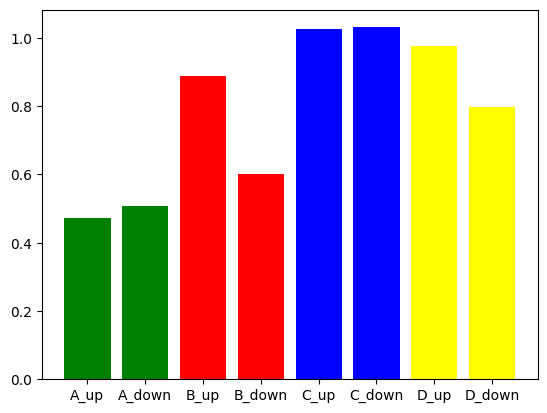

In [6]:
temp = {'A': [0.47297165954173775, 0.5072945784294073], 'B': [0.889002567258858, 0.6002680943768932], 'C': [1.0260349031968095, 1.0315903612009998], 'D': [0.9764871257865607, 0.7980877849346587]}
